<a href="https://colab.research.google.com/github/Drovie/Machine_Learning/blob/main/%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0%20%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%89%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/sample_data/student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
def create_holes(dataframe, column_name, hole_percentage = 60): # программа для порчи данных - незаменимая вещь. Теперь в случае утраты виноват не ты, а программа


    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes

In [ ]:
dwh = create_holes(df, 'absences') #вырезаем значения из колонки absences
dwh

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4.0,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,NaN,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6.0,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0.0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0.0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4.0,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4.0,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6.0,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,NaN,10,10,10


In [ ]:
#Удаление
df_cleaned = dwh.dropna()
df_cleaned

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4.0,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2.0,9,11,11
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0.0,11,13,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2.0,10,13,13
16,GP,F,16,U,GT3,T,4,4,services,services,...,3,2,3,1,2,2,10.0,13,13,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,0.0,7,7,0
641,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,0.0,14,17,15
642,MS,F,17,U,GT3,T,4,3,teacher,other,...,5,5,4,1,1,1,0.0,6,9,11
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4.0,10,11,10


In [ ]:
#Заполнение при помощи медианы
df_filled_median = dwh.fillna(dwh.median())

df_filled_median

<ipython-input-42-bfc158fc41ee>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = dwh.fillna(dwh.median())


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4.0,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2.0,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6.0,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0.0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0.0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4.0,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4.0,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6.0,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,2.0,10,10,10


In [ ]:
#Заполнение при помощи среднего
df_filled_mean = np.round(dwh.fillna(dwh.mean()))

df_filled_mean

<ipython-input-47-a4c33957fb78>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = np.round(dwh.fillna(dwh.mean()))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4.0,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6.0,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0.0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0.0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4.0,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4.0,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6.0,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,4.0,10,10,10


In [ ]:
#Заполнение при помощи моды
df_filled_mode = dwh.fillna(dwh["absences"].mode()[0])
"""
Мода возвращает объект Series, так как
значений моды может быть несколько
"""
df_filled_mode

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4.0,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,0.0,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6.0,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0.0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0.0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4.0,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4.0,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6.0,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,0.0,10,10,10


In [ ]:
#Заполнение при помощи интерполяции
df_interpolated = dwh.interpolate()

df_interpolated

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4.0,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,5.0,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6.0,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0.0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0.0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4.0,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4.0,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6.0,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6.0,10,10,10


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


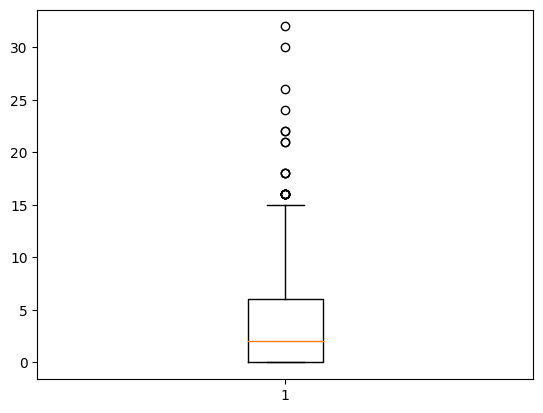

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

In [ ]:
plt.boxplot(df["absences"])
plt.show()
df['absences'].describe()

По боксплоту видно, что есть выбросы на аномалии от 15 до > 30




In [ ]:
#Методом среднего
mean = df["absences"].mean()
std = df["absences"].std()
threshold = std *1.5

outliers = [x for x in df["absences"] if abs(x - mean) > threshold]
print("Аномалии:", outliers)

df_clean = df[abs((df["absences"] - mean) < threshold)]
#df_clean #избавлемся от аномалий

Аномалии: [16, 14, 14, 12, 16, 12, 14, 12, 12, 24, 22, 16, 14, 32, 16, 16, 30, 21, 14, 15, 16, 12, 18, 16, 14, 26, 14, 16, 12, 12, 16, 15, 22, 18, 12, 14, 12, 18, 16, 11, 21, 13, 11, 11, 12, 12, 11, 11, 12]


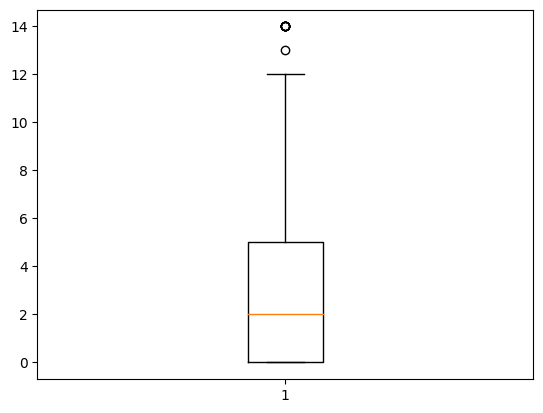

count    626.000000
mean       3.087859
std        3.503180
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       14.000000
Name: absences, dtype: float64

In [ ]:
#При помощи межквартильного размаха
q1 =  df["absences"].quantile(0.25)
q3 = df["absences"].quantile(0.75)
iqr = q3 - q1
df_iqr = df[(df["absences"] > (q1-1.5*iqr )) & (df["absences"] < (q3+1.5*iqr))]
plt.boxplot(df_iqr["absences"])
plt.show()
df_iqr["absences"].describe()



In [ ]:
#Статистика до обработки
df['absences'].describe()

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

Статистика после обработки аномалий методом среднего:


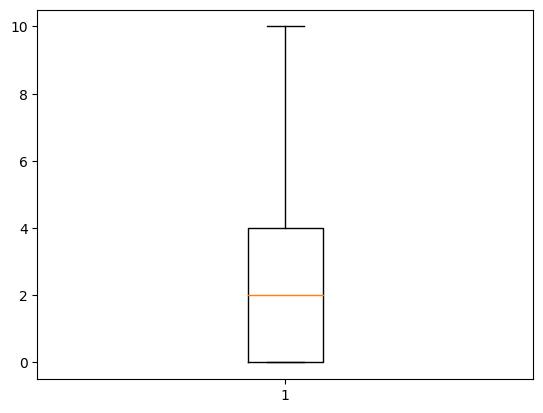

count    600.000000
mean       2.681667
std        2.961692
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: absences, dtype: float64

In [ ]:
#Статистика и объяснение
print("Статистика после обработки аномалий методом среднего:")
plt.boxplot(df_clean["absences"])
plt.show()
df_clean["absences"].describe()

Статистика после обработки данный методом интерквартильного размаха


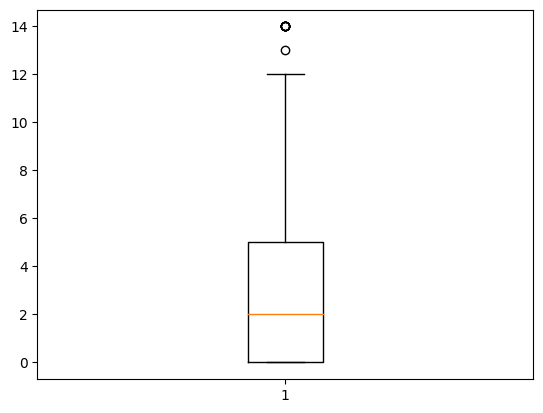

count    626.000000
mean       3.087859
std        3.503180
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       14.000000
Name: absences, dtype: float64

In [ ]:
print("Статистика после обработки данный методом интерквартильного размаха")
plt.boxplot(df_iqr["absences"])
plt.show()
df_iqr["absences"].describe()


По резултатам работы с аномалиями стандартное отклонение уменьшилось, максимальное значение стало минимум в 2 раза меньше, среднее значение уменьшилось вполтора раза, на боксплоте, построенному по данным, обработанным метдом среднего, не отображаются аномалии

**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [ ]:
#Проверка на дубли
doubles = df[df.duplicated()]
doubles

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
#Удаление дублей
drop_doubles = df.drop_duplicates()
drop_doubles

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
df_minmax_scale = df.copy()
num_features = df.select_dtypes(include=['int64']).columns
df_minmax_scale[num_features] = min_max_scaler.fit_transform(df[num_features])


df_minmax_scale.absences.unique() # Например, преобразованные уникальные значения колонки absences в диапазоне от 0 до 1

array([0.125  , 0.0625 , 0.1875 , 0.     , 0.3125 , 0.25   , 0.5    ,
       0.4375 , 0.03125, 0.375  , 0.75   , 0.6875 , 1.     , 0.9375 ,
       0.65625, 0.46875, 0.28125, 0.5625 , 0.8125 , 0.21875, 0.34375,
       0.15625, 0.40625, 0.09375])

In [ ]:
df_minmax_scale #датафрейм с преобразованными числовыми значениями

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,0.428571,U,GT3,A,1.00,1.00,at_home,teacher,...,0.75,0.50,0.75,0.00,0.00,0.50,0.1250,0.000000,0.578947,0.578947
1,GP,F,0.285714,U,GT3,T,0.25,0.25,at_home,other,...,1.00,0.50,0.50,0.00,0.00,0.50,0.0625,0.473684,0.578947,0.578947
2,GP,F,0.000000,U,LE3,T,0.25,0.25,at_home,other,...,0.75,0.50,0.25,0.25,0.50,0.50,0.1875,0.631579,0.684211,0.631579
3,GP,F,0.000000,U,GT3,T,1.00,0.50,health,services,...,0.50,0.25,0.25,0.00,0.00,1.00,0.0000,0.736842,0.736842,0.736842
4,GP,F,0.142857,U,GT3,T,0.75,0.75,other,other,...,0.75,0.50,0.25,0.00,0.25,1.00,0.0000,0.578947,0.684211,0.684211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,0.571429,R,GT3,T,0.50,0.75,services,other,...,1.00,0.75,0.25,0.00,0.25,1.00,0.1250,0.526316,0.578947,0.526316
645,MS,F,0.428571,U,LE3,T,0.75,0.25,teacher,services,...,0.75,0.50,0.75,0.00,0.00,0.00,0.1250,0.789474,0.789474,0.842105
646,MS,F,0.428571,U,GT3,T,0.25,0.25,other,other,...,0.00,0.00,0.00,0.00,0.00,1.00,0.1875,0.578947,0.631579,0.473684
647,MS,M,0.285714,U,LE3,T,0.75,0.25,services,services,...,0.25,0.75,1.00,0.50,0.75,0.25,0.1875,0.526316,0.526316,0.526316


In [ ]:
#StandartScaler
scaler_std = StandardScaler()
df_std_scale = df.copy()
df_std_scale[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scale.absences.unique()

array([ 0.07343336, -0.35786305,  0.50472977, -0.78915946,  1.36732259,
        0.93602618,  2.66121183,  2.22991542, -0.57351125,  1.79861901,
        4.38639747,  3.95510106,  6.11158311,  5.6802867 ,  3.73945285,
        2.44556362,  1.15167439,  3.09250824,  4.81769388,  0.72037798,
        1.5829708 ,  0.28908157,  2.01426721, -0.14221484])

In [ ]:
df_std_scale

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,1.031695,U,GT3,A,1.310216,1.540715,at_home,teacher,...,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658
1,GP,F,0.210137,U,GT3,T,-1.336039,-1.188832,at_home,other,...,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658
2,GP,F,-1.432980,U,LE3,T,-1.336039,-1.188832,at_home,other,...,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116
3,GP,F,-1.432980,U,GT3,T,1.310216,-0.278983,health,services,...,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615,0.648663
4,GP,F,-0.611422,U,GT3,T,0.428131,0.630866,other,other,...,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137,0.338889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,1.853254,R,GT3,T,-0.453954,0.630866,services,other,...,1.119748,0.780478,-1.008546,-0.543555,-0.218508,1.012903,0.073433,-0.510025,-0.195820,-0.590431
645,MS,F,1.031695,U,LE3,T,0.428131,-1.188832,teacher,services,...,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-1.754987,0.073433,1.312697,1.178093,1.268209
646,MS,F,1.031695,U,GT3,T,-1.336039,-1.188832,other,other,...,-3.068820,-2.075896,-1.859711,-0.543555,-0.997695,1.012903,0.504730,-0.145481,0.147659,-0.900204
647,MS,M,0.210137,U,LE3,T,0.428131,-1.188832,services,services,...,-2.021678,0.780478,1.544950,1.620662,1.339864,-1.063015,0.504730,-0.510025,-0.539298,-0.590431


Масштабируйте категориальные признаки через OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
#df.info() # изначально категориальных переменных нет...
df['famsize'] = df['famsize'].astype("category") # поэтому я преобразовал парочку
df['Pstatus'] = df['Pstatus'].astype("category")
df['school'] = df['school'].astype("category")
df['sex'] = df['sex'].astype("category")
df['romantic'] = df['romantic'].astype("category")


cat_features = df.select_dtypes(include=['category']).columns
df_cat_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
cat_features


Index(['school', 'sex', 'famsize', 'Pstatus', 'romantic'], dtype='object')

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[cat_features])
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns


df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns) # получаем датафрейм с закодированными признаками
df_encoded


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,school_GP,school_MS,sex_F,sex_M,famsize_no,famsize_yes,Pstatus_F,Pstatus_M,romantic_no,romantic_yes
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
644,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
645,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
646,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
647,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#Добавляем новые признаки в исходный датафрейм
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Удаление исходных категориальных признаков
df_copy = df_copy.drop(columns=cat_features)
df_copy

,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,...,school_GP,school_MS,sex_F,sex_M,famsize_no,famsize_yes,Pstatus_F,Pstatus_M,romantic_no,romantic_yes
0,18,U,4,4,at_home,teacher,course,mother,2,2,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,17,U,1,1,at_home,other,course,father,1,2,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,15,U,1,1,at_home,other,other,mother,1,2,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,15,U,4,2,health,services,home,mother,1,3,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,16,U,3,3,other,other,home,father,1,2,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,R,2,3,services,other,course,mother,1,3,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
645,18,U,3,1,teacher,services,course,mother,1,2,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
646,18,U,1,1,other,other,course,mother,2,2,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
647,17,U,3,1,services,services,course,mother,2,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
